### Feat2LLM


In this tutorial you will learn how to generate a string based representation for any numerical feature vector.

<img src="scheme.png" width="90%" height="40%" />

Steps 1 to 3 in the diagram are all executed in the next cell, where ethanol is the target molecule.
But let us break down what happens in each step.

1) First we download the MD trajectory data and store it

2) Based on the molecular geometries we generate representation vectors, here the MBDF representation [1]. To further compress the representation, we perform a dimensionality reduction, here down to 10 components

3) Finally the compressed (numerical!) representation vectors are saved to disk


[1] Danish Khan, Stefan Heinen, O. Anatole von Lilienfeld; Kernel based quantum machine learning at record rate: Many-body distribution functionals as compact representations. J. Chem. Phys. 21 July 2023; 159 (3): 034106. https://doi.org/10.1063/5.0152215

In [1]:
import os
from Feat2LLM.load_data import SmallMolTraj

mol = "ethanol"
smallMol = SmallMolTraj(mol)
smallMol.get_data()
smallMol.gen_representation(n_components=10)
smallMol.save()

/Users/jan/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
File already exists


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
exp

Take the liberty and inspect some of the attributes closer, such as the molecular geometries
`R` and total energies `E`

In [2]:
smallMol.R, smallMol.R.shape, smallMol.E

(array([[[-0.14365933, -0.11813374, -0.56843375],
         [-0.17613   ,  1.28513285, -0.00859315],
         [ 0.21953989, -1.07718569,  0.51279995],
         ...,
         [ 0.86485323,  1.37019756,  0.45488715],
         [-0.22079702,  2.03512503, -0.80257909],
         [ 1.18606471, -0.96054634,  0.66677837]],
 
        [[-0.10578499, -0.1377193 ,  0.52079075],
         [ 0.78920739,  1.024839  ,  0.19255651],
         [-0.6782202 , -0.79550559, -0.64059023],
         ...,
         [ 1.29847161,  1.52733501,  1.06527919],
         [ 1.66915007,  0.64810055, -0.37921081],
         [-0.14135049, -1.53521526, -0.90199907]],
 
        [[ 0.46183668, -0.09754942,  0.30830768],
         [ 0.36440547,  0.91478488, -0.90718201],
         [-0.73503446, -0.82403172,  0.51703842],
         ...,
         [ 0.19877599,  1.9700135 , -0.57844053],
         [ 1.30434569,  1.06046813, -1.41975101],
         [-1.26015108, -0.15773751,  0.93072344]],
 
        ...,
 
        [[-0.08989914,  0.36860874

The results for the representation vector `cMBDF` as well as the version in fewer dimensions `cMBDF_trans`, are saved in the `results` attribute. Note that `y` is the same as `E`.

In [3]:
smallMol.results

{'cMBDF': array([[ 2.89983701e+00,  2.88840014e+00,  2.76698828e+00, ...,
          3.14799400e-01,  1.98983208e-01, -3.56525590e-01],
        [ 3.08008333e+00,  2.98886867e+00,  2.86214369e+00, ...,
          2.96018251e-01,  1.30452935e-01, -6.65330637e-01],
        [ 3.13507108e+00,  2.83756928e+00,  2.69851356e+00, ...,
          8.30616302e-02, -2.69229113e-03,  2.25016725e-01],
        ...,
        [ 2.78829167e+00,  2.78553966e+00,  2.77601557e+00, ...,
          2.06898326e-01,  8.24476957e-02, -8.11069806e-01],
        [ 2.97484197e+00,  2.80881947e+00,  2.78650804e+00, ...,
          4.22128515e-01,  1.43599584e-01, -9.53113798e-01],
        [ 2.89107775e+00,  2.80813578e+00,  2.71874738e+00, ...,
          1.69056742e-01, -2.42575075e-02, -4.26317724e-01]]),
 'cMBDF_trans': array([[ 0.79179631, -0.57478478,  1.09360668, ..., -0.10319124,
         -0.28056333, -0.59782561],
        [-1.77305174,  2.26196867,  0.24581852, ..., -0.13911092,
         -0.01093774,  0.13706114],
 

Next we just visualize the first two dimensions of the representation vector

In [2]:
X, y = smallMol.results["cMBDF_trans"], smallMol.results["y"]

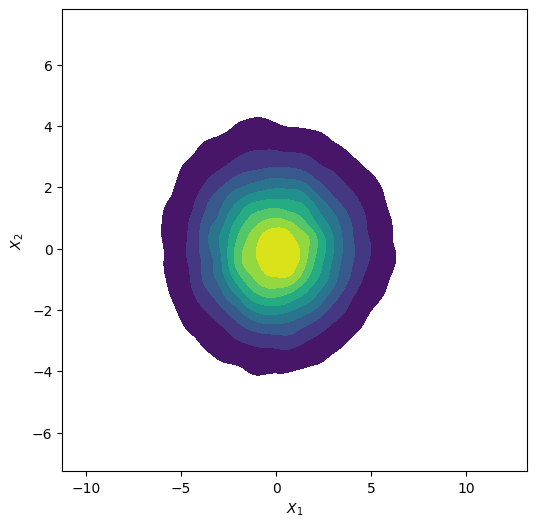

In [7]:
# select first two columns of X
import seaborn as sns
import matplotlib.pyplot as plt
X = X[:, :2]
import pandas as pd

data = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])

# Plotting the density plot using seaborn
plt.figure(figsize=(6, 6))
sns.kdeplot(x=data["Feature 1"], y=data["Feature 2"], cmap="viridis", fill=True)

plt.xlabel("$X_{1}$")
plt.ylabel("$X_{2}$")
plt.show()

Finally we perform the last step before fitting the model, we convert the numerical vectors to string representations

In [8]:
from Feat2LLM.vec2str import ZipFeaturizer
from sklearn.model_selection import train_test_split


X = smallMol.results["cMBDF_trans"]
y = smallMol.results["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
converter = ZipFeaturizer(n_bins=300)

X_train = converter.bin_vectors(X_train)
X_test = converter.bin_vectors(X_test)

In [ ]:
X_test

In [ ]:
from Feat2LLM.roberta_finetuning import write_data_to_json, load_JSON_data, MoleculeDataset

# change the filename depending on the dataset
write_data_to_json(X_train, y_train, 'train.json')
write_data_to_json(X_test, y_test, 'test.json')

data = load_JSON_data("train.json")

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from transformers import RobertaTokenizer, RobertaModel, AdamW 

# Split the data into training and test sets (modify as needed if already split)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
tokenizer       = RobertaTokenizer.from_pretrained('roberta-base')
train_dataset   = MoleculeDataset(train_data, tokenizer)
test_dataset    = MoleculeDataset(test_data, tokenizer)

# Define the custom model with a regression head
class RobertaForRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.roberta = RobertaModel.from_pretrained('roberta-base')
        self.regression_head = nn.Linear(self.roberta.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state[:, 0, :]
        logits = self.regression_head(sequence_output)
        return logits

# Set device: Apple/NVIDIA/CPU
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
model = RobertaForRegression().to(device)
optimizer = AdamW(model.parameters(), lr=1e-6)

# DataLoader setup
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training loop
model.train()
for epoch in range(2):  # Number of epochs
    for batch in train_loader:
        optimizer.zero_grad()
        inputs, labels = batch['input_ids'].to(device), batch['labels'].to(device)
        mask = batch['attention_mask'].to(device)
        outputs = model(inputs, mask).squeeze(-1)
        loss = nn.MSELoss()(outputs, labels)
        loss.backward()
        optimizer.step()
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Evaluate the model
model.eval()
total_loss = 0
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch['input_ids'].to(device), batch['labels'].to(device)
        mask = batch['attention_mask'].to(device)
        outputs = model(inputs, mask).squeeze(-1)
        loss = nn.MSELoss()(outputs, labels)
        total_loss += loss.item()
    print(f"Test Loss: {total_loss / len(test_loader)}")

# Save model and optimizer state
def save_model(model, optimizer, epoch, loss, filepath):
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'epoch': epoch,
        'loss': loss
    }, filepath)

# Assuming you want to save the model after training
model.eval()

if not os.path.exists('save_models'):
    os.makedirs('save_models')

save_model(model, optimizer, epoch, loss.item(), "regression.pth")